<IPython.core.display.Javascript object>


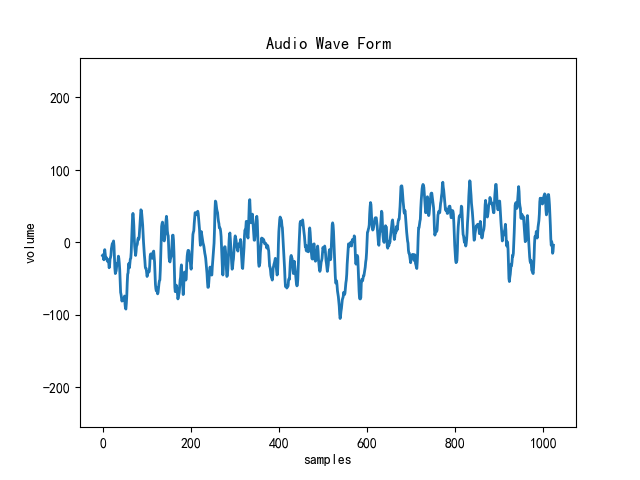

start stream
----------------- 
frame rate 15.646410, frame count 157
----------------- 


In [21]:
%matplotlib notebook

import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

pdev = pyaudio.PyAudio()
stream = pdev.open(format = FORMAT,
                   channels = CHANNELS,
                   rate = RATE,
                   input = True,
                   frames_per_buffer = CHUNK)


plt.ion()

fig, ax = plt.subplots()
ax.set_title('Audio Wave Form')
ax.set_xlabel('samples')
ax.set_ylabel('volume')
ax.set_ylim(-255, 255)
#ax.set_xlim(0, CHUNK)

x = np.arange(0, CHUNK)
line, = ax.plot(x, np.random.rand(CHUNK), '-', lw=2)

print('start stream')

start_time = time.time()
frame_count = 0

while time.time() - start_time < 10:
    data = stream.read(CHUNK)
    data_np = np.fromstring(data, dtype=np.short)
    # data_np = np.frombuffer(data, np.int16)
    line.set_ydata(data_np)
    try:
        plt.pause(0.001)
    except:
        pass
    
    frame_count += 1

end_time = time.time()
stream.close()
pdev.terminate()

frame_rate = frame_count / (end_time - start_time)

print('----------------- ')
print('frame rate %f, frame count %d' % (frame_rate, frame_count))
print('----------------- ')


### 参考

* [Audio-Spectrum-Analyzer-in-Python](https://github.com/markjay4k/Audio-Spectrum-Analyzer-in-Python)